# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "CF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'CF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_CF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.446  1  0.849 0.358 0.004   
                             age        0.056  1  0.108 0.743 0.001   
                             Kiel       1.844  1  3.512 0.062 0.018   
                             Magdeburg  4.640  1  8.838 0.003 0.044   
                             Sweden     7.688  1 14.644 0.000 0.071   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.074  1  1.072 0.302 0.006   
                             age        0.607  1  0.605 0.437 0.003   
                             Kiel       0.160  1  0.160 0.690 0.001   
                             Magdeburg  1.511  1  1.507 0.221 0.008   
                             Sweden    14.322  1 14.289 0.000 0.070   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.446  0.523    False  
                             age               0.129  0.837    False  
                             Kiel              1.205  0.144    False  
                             Magdeburg         2.478  0.014     True  
                             Sweden            3.755  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.520  0.464    False  
                             age               0.359  0.597    False  
                             Kiel              0.161  0.801    False  
                             Magdeburg         0.655  0.375    False  
                             Sweden            3.679  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      CF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.979  1  6.788 0.010 0.034   
                             age        0.012  1  0.085 0.771 0.000   
                             Kiel       0.341  1  2.361 0.126 0.012   
                             Magdeburg  0.596  1  4.132 0.043 0.021   
                             Sweden     1.866  1 12.936 0.000 0.063   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.918  1  5.530 0.020 0.028   
                             age        0.208  1  0.395 0.530 0.002   
                             Kiel       2.456  1  4.654 0.032 0.024   
                             Magdeburg  1.807  1  3.426 0.066 0.018   
                             Sweden    20.013  1 37.933 0.000 0.166   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.004  0.027     True  
                             age               0.113  0.843    False  
                             Kiel              0.899  0.221    False  
                             Magdeburg         1.362  0.093    False  
                             Sweden            3.387  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.705  0.048     True  
                             age               0.275  0.651    False  
                             Kiel              1.492  0.073    False  
                             Magdeburg         1.182  0.131    False  
                             Sweden            8.373  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     CF                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.010         2.004  0.027     True   
                             Kiel      0.126         0.899  0.221    False   
                             Magdeburg 0.043         1.362  0.093    False   
                             Sweden    0.000         3.387  0.002     True   
                             age       0.771         0.113  0.843    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.020         1.705  0.048     True   
                             Kiel      0.032         1.492  0.073    False   
                             Magdeburg 0.066         1.182  0.131    False   
                             Sweden    0.000         8.373  0.000     True   
                             age       0.530         0.275  0.651    False   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.358         0.446  0.523    False  
                             Kiel      0.062         1.205  0.144    False  
                             Magdeburg 0.003         2.478  0.014     True  
                             Sweden    0.000         3.755  0.001     True  
                             age       0.743         0.129  0.837    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.302         0.520  0.464    False  
                             Kiel      0.690         0.161  0.801    False  
                             Magdeburg 0.221         0.655  0.375    False  
                             Sweden    0.000         3.679  0.001     True  
                             age       0.437         0.359  0.597    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'CF': 'CF', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.226         3.210     0.281     0.261         2.491     0.338
std       0.293         6.101     0.319     0.303         5.379     0.331
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.001         0.398     0.003     0.004         0.330     0.014
50%       0.065         1.190     0.129     0.122         0.913     0.244
75%       0.400         3.194     0.533     0.468         2.448     0.624
max       1.000        85.744     1.000     0.999       144.455     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_50730/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        CF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.010         2.004   
A0A024R0T9;K7ER74;P02655                           AD     0.028         1.546   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.614         0.212   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.246         0.609   
A0A075B6H7                                         AD     0.001         3.101   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.259         0.588   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.733         0.135   
S4R3U6                                             AD     0.020         1.705   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.027     True   
A0A024R0T9;K7ER74;P02655                           AD      0.065    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.718    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.372    False   
A0A075B6H7                                         AD      0.003     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.285    False   
Q9Y6X5                                             AD      0.387    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.159    False   
Q9Y6Y9                                             AD      0.814    False   
S4R3U6                                             AD      0.048     True   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.358         0.446   
A0A024R0T9;K7ER74;P02655                           AD     0.035         1.455   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.069         1.163   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.552         0.258   
A0A075B6H7                                         AD     0.131         0.884   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.084         1.074   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.506         0.296   
S4R3U6                                             AD     0.302         0.520   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.523    False  
A0A024R0T9;K7ER74;P02655                           AD      0.092    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.155    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.693    False  
A0A075B6H7                                         AD      0.257    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.240         1.580     0.302     0.253         1.410     0.335
std       0.291         1.877     0.314     0.291         1.661     0.316
min       0.000         0.003     0.000     0.000         0.000     0.000
25%       0.008         0.365     0.024     0.011         0.363     0.037
50%       0.088         1.057     0.165     0.122         0.913     0.244
75%       0.431         2.077     0.563     0.434         1.942     0.594
max       0.994        25.446     0.996     0.999        25.374     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,CF,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,953,1028


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.010         2.004  0.027   
A0A024R0T9;K7ER74;P02655                           0.028         1.546  0.065   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.614         0.212  0.718   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.246         0.609  0.372   
A0A075B6H7                                         0.001         3.101  0.003   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.285   
Q9Y6X5                                             0.259         0.588  0.387   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.159   
Q9Y6Y9                                             0.733         0.135  0.814   
S4R3U6                                             0.020         1.705  0.048   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.358   
A0A024R0T9;K7ER74;P02655                              False 0.035   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.069   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.552   
A0A075B6H7                                             True 0.131   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.084   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.506   
S4R3U6                                                 True 0.302   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.446  0.523   
A0A024R0T9;K7ER74;P02655                                   1.455  0.092   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.163  0.155   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.258  0.693   
A0A075B6H7                                                 0.884  0.257   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.318   
Q9Y6X5                                                     1.074  0.183   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     0.296  0.658   
S4R3U6                                                     0.520  0.464   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
CF (no)  - PI (no)    899
CF (yes) - PI (yes)   339
CF (yes) - PI (no)    129
CF (no)  - PI (yes)    54
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_50730/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


CF                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.010         2.004  0.027     True 0.358   
A0A075B6H7                   0.001         3.101  0.003     True 0.131   
A0A075B6I0                   0.001         3.020  0.004     True 0.020   
A0A075B6R2                   0.000         3.365  0.002     True 0.396   
A0A075B6S5                   0.010         2.003  0.027     True 0.117   
...                            ...           ...    ...      ...   ...   
Q9UNW1                       0.503         0.298  0.628    False 0.013   
Q9UP79                       0.000         4.677  0.000     True 0.466   
Q9UQ52                       0.000         3.318  0.002     True 0.184   
Q9Y6C2                       0.015         1.819  0.039     True 0.624   
S4R3U6                       0.020         1.705  0.048     True 0.302   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.446  0.523    False       186  
A0A075B6H7                           0.884  0.257    False        91  
A0A075B6I0                           1.695  0.060    False       194  
A0A075B6R2                           0.403  0.557    False       164  
A0A075B6S5                           0.933  0.236    False       129  
...                                    ...    ...      ...       ...  
Q9UNW1                               1.891  0.041     True       171  
Q9UP79                               0.332  0.622    False       135  
Q9UQ52                               0.735  0.329    False       188  
Q9Y6C2                               0.205  0.752    False       119  
S4R3U6                               0.520  0.464    False       126  

[183 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,CF,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.027,0.523,186,CF (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.065,0.092,195,CF (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.718,0.155,174,CF (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.372,0.693,196,CF (no) - PI (no)
A0A075B6H7,0.003,0.257,91,CF (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.285,0.318,197,CF (no) - PI (no)
Q9Y6X5,0.387,0.183,173,CF (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.159,0.182,197,CF (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,CF,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E5RJY1;E7ESM1;Q92597;Q92597-2;Q92597-3,0.011,0.977,60,CF (yes) - PI (no),0.966
A6NCT7;Q07092;Q07092-2,0.024,0.987,147,CF (yes) - PI (no),0.963
O15197;O15197-3,0.027,0.981,104,CF (yes) - PI (no),0.954
Q9NRB3,0.972,0.025,82,CF (no) - PI (yes),0.947
Q9H8J5,0.936,0.000,173,CF (no) - PI (yes),0.936
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.047,0.057,197,CF (yes) - PI (no),0.010
Q9NX62,0.046,0.056,197,CF (yes) - PI (no),0.010
P00740;P00740-2,0.044,0.053,197,CF (yes) - PI (no),0.009


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_1_CF


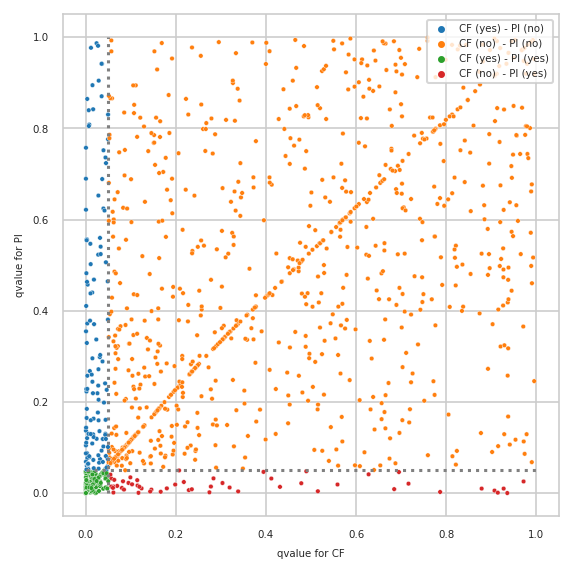

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_2_CF


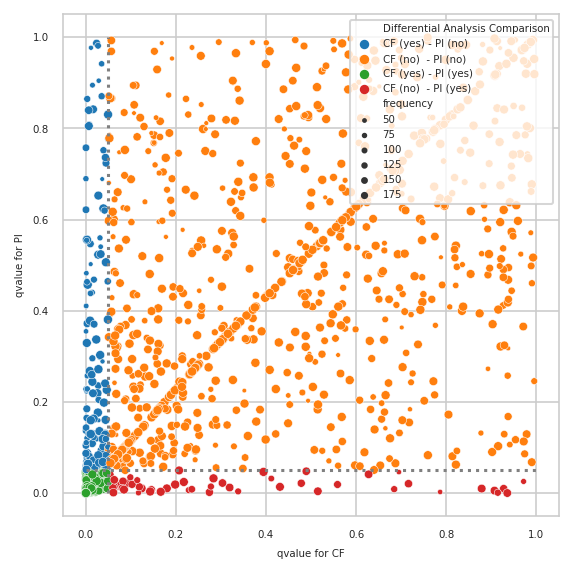

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
PSEN2,ENSP00000355747,5.000
MAPT,ENSP00000340820,4.800
...,...,...
LPIN3,ENSP00000487971,0.681
HECTD1,ENSP00000382269,0.681
ETNK1,ENSP00000500633,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/9315d83d47168fa3da1739d7e683ad72_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out